In [52]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%notebook inline

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
#read the dataset
#source : Coursera "Statistics for Data science with python"
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col=0)

### Dataset Description
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [13]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [14]:
boston_df.shape

(506, 13)

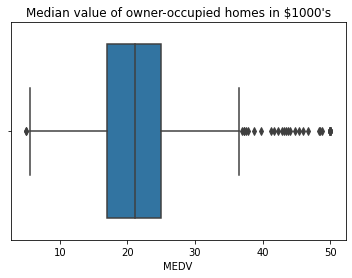

In [20]:
#boxplot for owner occupied home
sns.boxplot(x ='MEDV', data = boston_df)
plt.title("Median value of owner-occupied homes in $1000's")
plt.show()

In [21]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

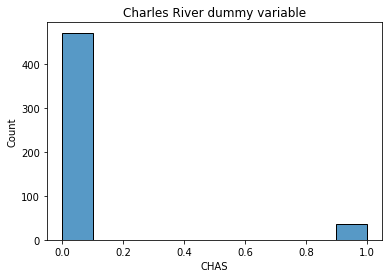

In [26]:
#histogram for charles river variable
sns.histplot(data = boston_df,
             x = 'CHAS')
plt.title("Charles River dummy variable")
plt.show()

In the above figure, we see that almost all the values are either zero or one. A `bar plot` would have been hood given that it is a categorical variable.

In [107]:
#check whether the median value of owner occupied home have any dependency on the age( <=35yrs, >35 && <70, >=70)

boston_df.loc[boston_df.AGE<=35, 'age_group'] = "less than and equal to 35 year"
boston_df.loc[(boston_df.AGE>35) & (boston_df.AGE<70), 'age_group'] = "between 35 and 70 year"
boston_df.loc[boston_df.AGE>=70, 'age_group'] = "more than 70 year"

In [108]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 year
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,more than 70 year
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 year
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 year
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 year


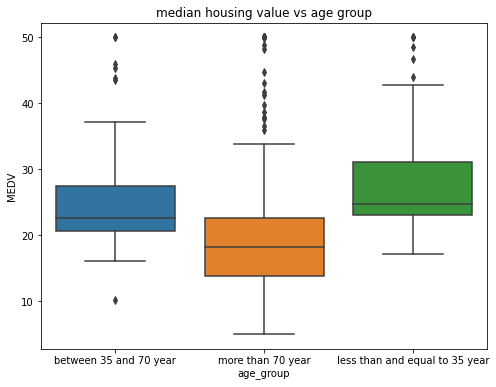

In [109]:
ax, fig = plt.subplots(1,1 ,figsize =(8,6))
sns.boxplot(x = 'age_group',
            y = 'MEDV',
            data=boston_df)

plt.title('median housing value vs age group')

plt.show()

We see that Owner below the age of 70 year, is having maximum housing median values and that of older age group is having minimum housing value. 

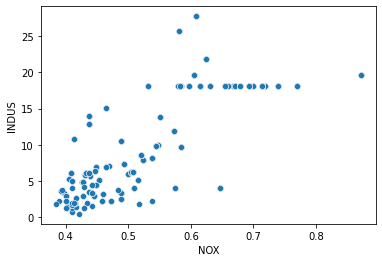

In [110]:
sns.scatterplot(x = 'NOX', y ='INDUS', data = boston_df)
plt.show()

Just by looking at the graph we can say that both INDUS and NOX are positively correlated,  Let'c check it statistically.

In [111]:
#NULL:  No relation exist between these values
#Alternate: Both the variables are related
#alpha : 0.5
stats.pearsonr(boston_df.NOX, boston_df.INDUS)

(0.7636514469209157, 7.913361061233745e-98)

We see that pval is less than alpha, hence we reject the null hypothesis. Also by looking at the `correlation coefficient` we can say with high confidence that both the variables are statistically higly correlated. We can also check it using the `regression analysis`

In [112]:
#Regression analysis for correlation between NOX and INDUS

x = boston_df['NOX']
y = boston_df['INDUS']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           7.91e-98
Time:                        02:27:39   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

in the above summary, we can see that pval < 0.05, so we can reject the null hypothesis saying that there is no relation between  NOX and INDUS.

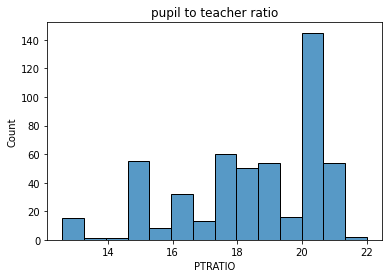

In [113]:
sns.histplot(x = 'PTRATIO', data = boston_df)
plt.title("pupil to teacher ratio")
plt.show()

## Statistical Test

### Is there a significant difference in median value of houses bounded by the Charles river or not?

In [114]:
#Assumtion: MEDV follows normal distribution
# 2-sample  T-test
#Null: There is no significant difference
#Alternate: There is significant difference
#alpha  = 0.05

bounded = boston_df[boston_df.CHAS == 1]['MEDV']
not_bounded = boston_df[boston_df.CHAS == 0]['MEDV']

# Levene test for equal variance
tl, pl_val = stats.levene(bounded, not_bounded)

if pl_val > 0.05: #null hyppothesis true,  student t-test
    t, pval = stats.ttest_ind(bounded, not_bounded, equal_var = True)
else: # welch t-test
    t, pval = stats.ttest_ind(bounded, not_bounded, equal_var = False)

print("t:", t, "pval:", pval)
if pval > 0.05:
    print(" There is no significant difference between the median value of houses in any of the above mentioned case")
else:
    print("There is enough evidence that proves that median value of houses bounded by charles river is different from those not bounded by it.")


t: 3.113291312794837 pval: 0.003567170098137517
There is enough evidence that proves that median value of houses bounded by charles river is different from those not bounded by it.


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

In [115]:
boston_df.groupby('age_group').count()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
age_group,,,,,,,,,,,,,
between 35 and 70 year,128,128,128,128,128,128,128,128,128,128,128,128,128
less than and equal to 35 year,91,91,91,91,91,91,91,91,91,91,91,91,91
more than 70 year,287,287,287,287,287,287,287,287,287,287,287,287,287


Since there are more than two categories, we need to perform one-way ANOVA test

In [120]:
# using Naive scipy.stats.f_oneway function
gp1 = boston_df[boston_df.age_group == "less than and equal to 35 year"]['MEDV']
gp2 = boston_df[boston_df.age_group == "between 35 and 70 year"]['MEDV']
gp3 = boston_df[boston_df.age_group == "more than 70 year"]['MEDV']

#check for equality of variance
tl, pl_val = stats.levene(gp1, gp2, gp3, center ='mean')
if pl_val > 0.05:
    print("equal variance property is satisfied")
    
    # perform one-way anova
    f_static, pval = stats.f_oneway(gp1, gp2, gp3)
    print("f_static: ", f_static, "pval: ", pval)
    
    if pval > 0.05:
        print("There is no difference between median values of houses for each proportion of owner occupied units built prior to 1940.")
    else:
        print("Difference is statistically significant")
else:
    print(" Variance is not equal, aborting..")
    

equal variance property is satisfied
f_static:  36.40764999196599 pval:  1.7105011022702984e-15
Difference is statistically significant


In [122]:
#ANOVA with regression - 1
from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


In the above table also, we can see that pval is same as in the case of naive one-way anova. Since, pval < 0.05, we reject the null hypothesis stating that there is no significant difference. 

In [130]:
x = pd.get_dummies(boston_df[['age_group']])
print(x.shape)
y = boston_df['MEDV']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

(506, 3)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     24.17
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.27e-14
Time:                        03:02:00   Log-Likelihood:                -1806.1
No. Observations:                 506   AIC:                             3620.
Df Residuals:                     502   BIC:                             3637.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -3.858e+13   9.85e+13     -0.392      0.695   -2.32e+14    1.55e+14
age_group_between 35 and 70 year          3.858e+13   9.85e+13      0.392      0.695   -1.55e+14    2.32e+14
age_group_less than and equal to 35 year  3.858e+13   9.85e+13      0.392      0.695   -1.55e+14    2.32e+14
age_group_more than 70 year               3.858e+13   9.85e+13      0.392      0.695   -1.55e+14    2.32e+14
==============================================================================
Omnibus:                      158.208   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.392
Skew:                           1.590   Prob(JB):                     6.21e-86
Kurtosis:                       5.916   Cond. No.                     6.18e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.92e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In the above model descriptipn, we can see that pval < 0.05, so we reject the null hypothesis. We can statistically say woth 95% confidence interval that, there is significant difference in median value of houses for owner occupied units built before 1940.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [134]:
#Regression analysis
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.21e-08
Time:                        15:58:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From above model summary, we see that pval < 0.05, so we can reject the null hypothesis stating no relation among these values. And since the slope is positive, we can statistivally say with 95% confidence that these variables are statistically positively correlated.

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

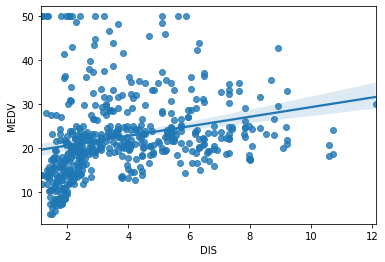

In [138]:
# lets check with sns,regplot
sns.regplot(x = 'DIS', y='MEDV', data = boston_df)